# MNIST Example : 이전 결과는 97.8%

- 데이터 로딩 및 확인 / 데이터 준비

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
raw_test = test_labels

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Using TensorFlow backend.


- 모델 정의

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

- 컴파일

In [4]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

- 모델 학습

In [5]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 11s 182us/step - loss: 0.1786 - accuracy: 0.9446
Epoch 2/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.0481 - accuracy: 0.9850
Epoch 3/5
60000/60000 [==============================] - 11s 183us/step - loss: 0.0336 - accuracy: 0.9901
Epoch 4/5
60000/60000 [==============================] - 11s 186us/step - loss: 0.0245 - accuracy: 0.9922
Epoch 5/5
60000/60000 [==============================] - 12s 194us/step - loss: 0.0196 - accuracy: 0.9939


- 성능평가

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

10000/10000 [==============================] - 1s 54us/step
0.9923999905586243


In [8]:
preds = model.predict_classes(test_images)
preds

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [17]:
len(preds[preds != raw_test])

76

In [64]:
[i for i, x in enumerate(preds != raw_test) if x]

[62,
 321,
 359,
 445,
 582,
 646,
 659,
 674,
 723,
 740,
 786,
 846,
 947,
 1014,
 1182,
 1226,
 1232,
 1260,
 1393,
 1522,
 1530,
 1709,
 1737,
 1790,
 1878,
 1901,
 2018,
 2023,
 2035,
 2070,
 2130,
 2135,
 2293,
 2414,
 2454,
 2488,
 2597,
 2654,
 2927,
 2939,
 2953,
 2995,
 3030,
 3225,
 3289,
 3422,
 3474,
 3503,
 3520,
 3550,
 3559,
 3727,
 3762,
 3850,
 3906,
 4007,
 4176,
 4201,
 4248,
 4497,
 4504,
 4536,
 4740,
 4860,
 5734,
 5937,
 5955,
 5997,
 6560,
 6576,
 6597,
 6625,
 6783,
 8376,
 9664,
 9839]

정답: 9
예측: 4


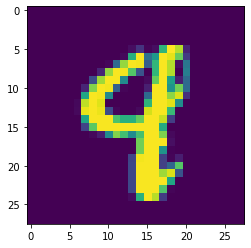

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
i=359
print('정답:', raw_test[i])
print('예측:', preds[i])
plt.imshow(test_images[i,:,:,0]);

정답: 6
예측: 0


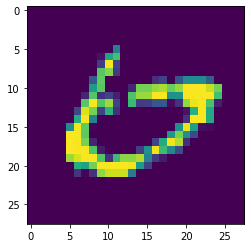

In [66]:
i=445
print('정답:', raw_test[i])
print('예측:', preds[i])
plt.imshow(test_images[i,:,:,0]);